Important Imports

In [16]:
# Basic Imports
import numpy as np
import pandas as pd
import pickle

# NLP Imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from urllib.parse import urlparse
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Model Building Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Visualization and Validation Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

Data Visualization and Processing

In [17]:
df = pd.read_csv('../Datasets/Stress Detection Dataset/Stress.csv')
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [19]:
no_need_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
df = df.drop(no_need_cols,axis=1)
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


NLP Part

In [20]:
nltk.download('omw-1.4')
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Swastik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Swastik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\Swastik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swastik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swastik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
def textPocess(sent):
    try:
        # brackets replacing by space
        sent = re.sub('[][)(]',' ',sent)

        # url removing
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # removing escap characters
        sent = re.sub(r'\@\w+','',sent)

        # removing html tags 
        sent = re.sub(re.compile("<.*?>"),'',sent)

        # getting only characters and numbers from text
        sent = re.sub("[^A-Za-z0-9]",' ',sent)

        # lower case all words
        sent = sent.lower()
        
        # strip all words from sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # word tokenization
        tokens = word_tokenize(sent)
        
        # removing words which are in stopwords
        for word in tokens:
            if word in stop_words:
                tokens.remove(word)
        
        # lemmatization
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)
        return sent
    
    except Exception as ex:
        print(sent,"\n")
        print("Error ",ex)


with open('../models/Stress Indicator Model/textProcess_function.pkl', 'wb') as f:
    pickle.dump(textPocess, f)



In [23]:
df['processed_text'] = df['text'].apply(lambda text: textPocess(text))
df

,text,label,processed_text
0,"He said he had not felt that way before, sugge...",1,said had felt way suggeted go rest so trigger ...
1,"Hey there r/assistance, Not sure if this is th...",0,hey r assistance sure right place post but go ...
2,My mom then hit me with the newspaper and it s...,1,mom hit newspaper shocked that would this know...
3,"until i met my new boyfriend, he is amazing, h...",1,met new boyfriend amazing kind sweet is good s...
4,October is Domestic Violence Awareness Month a...,1,october domestic violence awareness month dome...
...,...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0,a week precious are ignored her jan 1 happy ye...
2834,I don't have the ability to cope with it anymo...,1,don have ability cope anymore trying lot thing...
2835,In case this is the first time you're reading ...,0,case is first time re reading post are looking...
2836,Do you find this normal? They have a good rela...,0,you find normal have good relationship main pr...


In [24]:
MIN_DF = 1 
cv = CountVectorizer(min_df=MIN_DF)
cv_df = cv.fit_transform(df['processed_text'])
cv_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
tf = TfidfVectorizer(min_df=MIN_DF)
tf_df = tf.fit_transform(df['processed_text'])

with open('../models/Stress Indicator Model/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tf, f)


tf_df.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
tf_df = pd.DataFrame(tf_df.toarray(),columns=tf.get_feature_names_out())
tf_df.head(3)

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
tf_df.describe()

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
count,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,0.000452,0.000548,0.000123,0.000159,0.000109,0.000069,0.003358,0.001783,0.000576,0.000106,...,0.000078,0.000072,0.000204,0.000078,0.000715,0.000126,0.000245,0.000089,0.000054,0.000040
std,0.011158,0.009998,0.006576,0.006636,0.005801,0.003671,0.021354,0.017204,0.011156,0.005624,...,0.004145,0.003845,0.007786,0.004157,0.011797,0.004733,0.006851,0.004754,0.002873,0.002105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.348402,0.327600,0.350306,0.333106,0.309059,0.195542,0.258662,0.267281,0.310333,0.299611,...,0.220793,0.204838,0.336077,0.221471,0.306537,0.183335,0.268149,0.253283,0.153067,0.112136


Model Building

In [29]:
X_train,X_test,y_train,y_test = train_test_split(cv_df,df['label'],stratify=df['label'])
print(X_train.shape,y_test.shape)

# Logistic Regression

model_lr = LogisticRegression().fit(X_train,y_train)
print("Logistic Regression Score Range : ",model_lr.score(X_train,y_train),model_lr.score(X_test,y_test))

# Naive Bias

model_nb = MultinomialNB().fit(X_train,y_train)
print("Naive Bias Score Range : ",model_nb.score(X_train,y_train),model_nb.score(X_test,y_test))

# Random Forest

model_rf = RandomForestClassifier().fit(X_train,y_train)
print("Random Forest Score Range : ",model_rf.score(X_train,y_train),model_rf.score(X_test,y_test))

(2128, 10271) (710,)
Logistic Regression Score Range :  0.9981203007518797 0.7267605633802817
Naive Bias Score Range :  0.9271616541353384 0.7507042253521127
Random Forest Score Range :  0.9990601503759399 0.7225352112676057


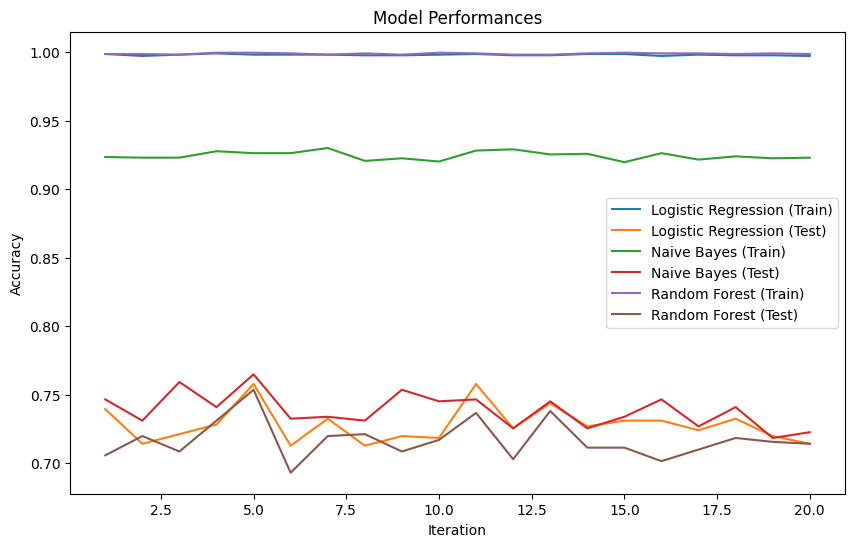

In [30]:
# Analyzing the trend of performance of each algorithms by Plot
# upto 10 itertaion


# Lists to store performance metrics
lr_train_scores = []
lr_test_scores = []
nb_train_scores = []
nb_test_scores = []
rf_train_scores = []
rf_test_scores = []

# Number of iterations for the loop
num_iterations = 20

for _ in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(cv_df, df['label'], stratify=df['label'])
    
    # Logistic Regression
    model_lr = LogisticRegression().fit(X_train, y_train)
    lr_train_scores.append(model_lr.score(X_train, y_train))
    lr_test_scores.append(model_lr.score(X_test, y_test))

    # Naive Bayes
    model_nb = MultinomialNB().fit(X_train, y_train)
    nb_train_scores.append(model_nb.score(X_train, y_train))
    nb_test_scores.append(model_nb.score(X_test, y_test))

    # Random Forest
    model_rf = RandomForestClassifier().fit(X_train, y_train)
    rf_train_scores.append(model_rf.score(X_train, y_train))
    rf_test_scores.append(model_rf.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(range(1, num_iterations + 1), lr_train_scores, label='Logistic Regression (Train)')
plt.plot(range(1, num_iterations + 1), lr_test_scores, label='Logistic Regression (Test)')
plt.plot(range(1, num_iterations + 1), nb_train_scores, label='Naive Bayes (Train)')
plt.plot(range(1, num_iterations + 1), nb_test_scores, label='Naive Bayes (Test)')
plt.plot(range(1, num_iterations + 1), rf_train_scores, label='Random Forest (Train)')
plt.plot(range(1, num_iterations + 1), rf_test_scores, label='Random Forest (Test)')

plt.title('Model Performances')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# Calculate average scores
lr_avg_train = np.mean(lr_train_scores)
lr_avg_test = np.mean(lr_test_scores)

nb_avg_train = np.mean(nb_train_scores)
nb_avg_test = np.mean(nb_test_scores)

rf_avg_train = np.mean(rf_train_scores)
rf_avg_test = np.mean(rf_test_scores)

# Print average scores
print("Logistic Regression - Average Train Score:", lr_avg_train)
print("Logistic Regression - Average Test Score:", lr_avg_test)

print("Naive Bayes - Average Train Score:", nb_avg_train)
print("Naive Bayes - Average Test Score:", nb_avg_test)

print("Random Forest - Average Train Score:", rf_avg_train)
print("Random Forest - Average Test Score:", rf_avg_test)

# Compare the average test scores to choose the best model
best_algorithm = max([
    ('Logistic Regression', lr_avg_test, abs(lr_avg_train - lr_avg_test)),
    ('Naive Bayes', nb_avg_test, abs(nb_avg_train - nb_avg_test)),
    ('Random Forest', rf_avg_test, abs(rf_avg_train - rf_avg_test))
], key=lambda x: x[1])

best_model = best_algorithm[0]

print("\nThe best algorithm is:", best_model)
print("Difference between Average Train and Test Scores:", best_algorithm[2])




Logistic Regression - Average Train Score: 0.9979793233082704
Logistic Regression - Average Test Score: 0.7280985915492958
Naive Bayes - Average Train Score: 0.9243656015037592
Naive Bayes - Average Test Score: 0.7384507042253521
Random Forest - Average Train Score: 0.9988251879699247
Random Forest - Average Test Score: 0.716830985915493

The best algorithm is: Naive Bayes
Difference between Average Train and Test Scores: 0.18591489727840715


In [32]:
y_pred = model_nb.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[197,  56],
       [141, 316]], dtype=int64)

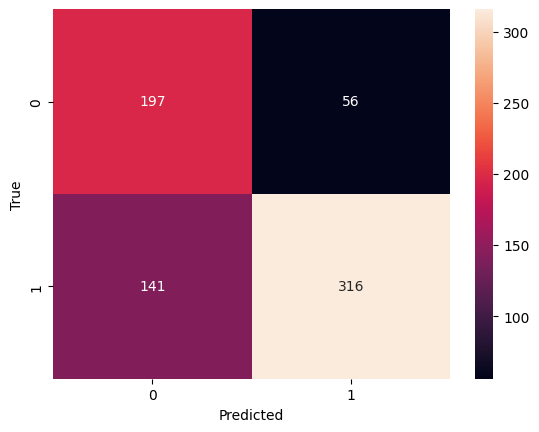

In [33]:
sns.heatmap(cm,annot=True,fmt='')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [34]:
model_nb = MultinomialNB().fit(tf_df,df['label'])
model_nb.score(tf_df,df['label'])

0.8312191684284708

In [35]:
def predictor(text):
    processed = textPocess(text)
    embedded_words = tf.transform([text])
    res = model_nb.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else:
        res = "this person is not in stress"
    return res

In [36]:
text1 = """This is the worst thing that happened to me today. I got less marks in my exam, 
            so it is not going to help me in my future."""
text2 = """Hi Shashank sir, I gained a lot of knowledge from you for my future use. 
            This was a very fun journey for me. Thanks for boosting my confidence."""
text3 = """User: Hi there! How are you doing today?

Chatbot: Hello! I'm doing well, thanks for asking. How about you?

User: I'm doing pretty well too, thanks. I just wanted to ask you a question about your service.

Chatbot: Of course, I'm here to help. What can I assist you with?

User: I'm interested in learning more about your pricing options. Can you provide me with some information?

Chatbot: Absolutely! We have several different pricing plans depending on your needs. 

Would you like me to send you a link to our pricing page?

User: Yes, that would be great. Also, do you offer any discounts or promotions?

Chatbot: Yes, we do offer discounts for long-term contracts and for certain types of organizations. 

Would you like me to provide more details?

User: That would be helpful, thank you.

Chatbot: Sure thing! Our team can provide you with all the information you need to make an informed decision. 

Is there anything else I can help you with today?"""

In [37]:
print(predictor(text1))
print(predictor(text2))
print(predictor(text3))

this person is in stress
this person is not in stress
this person is not in stress


Model Export

In [38]:
import pickle

# Save the model
with open('../models/Stress Indicator Model/stress_predictor_model.pkl', 'wb') as file:
    pickle.dump(model_nb, file)


# # Load the model
# # with open('naive_bayes_model.pkl', 'rb') as file:
# #     loaded_model = pickle.load(file)
